<a href="https://colab.research.google.com/github/amityu/BigData/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install spaCy
!pip install nltk

In [ ]:
import pandas as pd
import os
from tqdm import tqdm

os.chdir('/content/drive/MyDrive/BigDataProject')
RESOURCE_PATH = '../project_resources/'
#nltk.download('stopwords')
from nltk.corpus import stopwords
df = pd.read_csv(RESOURCE_PATH + './quater_p.csv')
df['p_text']=df['p_text'].apply(lambda x: x if len(str(x))>20 else 'NaN')
df = df.replace('NaN', 'None')
df = df.dropna()
df

,Unnamed: 0,a_url,p_text
0,0,https://realtyquarter.com/maharashtra-will-re-...,"Abhay Shah - May 4, 2022"
1,1,https://realtyquarter.com/aaditya-thackeray-su...,Maharashtra is set to reallocate stuck slum re...
2,2,https://realtyquarter.com/indias-biggest-india...,"Jitendra Awhad, the State Housing Minister, st..."
3,3,https://realtyquarter.com/kukatpally-land-scam...,He stated that the Slum Rehabilitation Authori...
4,4,https://realtyquarter.com/mumbai-a-couple-rece...,"According to Awhad, such builders have raised ..."
...,...,...,...
1167,1167,https://realtyquarter.com/get-ready-for-upcomi...,Your email address will not be published. Requ...
1168,1168,https://realtyquarter.com/interview-question-f...,None
1169,1169,https://realtyquarter.com/interview-of-shri-ga...,None
1170,1170,https://realtyquarter.com/biggest-sanitation-s...,None


In [ ]:
import spacy
nlp = spacy.load('en')

def get_entites_from_text(text):
    entities_dict= {}
    #using spaCy to get entities
    doc = nlp(text)
    for entity in doc.ents:
        label = entity.label_
        if  label not in entities_dict:
            entities_dict[label] = set()
        entities_dict[label].add(entity.text)        

    return entities_dict
    
    
#can take some time
df['NerDict'] = df['p_text'].apply(lambda t: get_entites_from_text(t))
df['NerDict'][0]

{'DATE': {'May 4, 2022'}, 'PERSON': {'Abhay Shah -'}}

In [ ]:
count_entities_dict = {}
for d in df['NerDict']:
    for entity_type, entity_set in d.items():
        if entity_type not in count_entities_dict:
            count_entities_dict[entity_type] = {}
        for name in entity_set:
            name = name.replace("\n", " ").strip().lower()
            if name not in count_entities_dict[entity_type]:
                count_entities_dict[entity_type][name] = 0
            count_entities_dict[entity_type][name] += 1

count_entities_dict

{'CARDINAL': {'0-50': 2,
  '1': 2,
  '1,000': 1,
  '1,035': 2,
  '1,200': 1,
  '1,584': 1,
  '1.17': 2,
  '1.32': 2,
  '10': 2,
  '10,000': 2,
  '100': 6,
  '109': 2,
  '11': 2,
  '12': 8,
  '120': 1,
  '13': 1,
  '14': 2,
  '15': 1,
  '153': 1,
  '161': 1,
  '162': 1,
  '2': 5,
  '2.5': 1,
  '2.9': 1,
  '2020': 2,
  '213.46': 1,
  '22': 2,
  '22a.': 2,
  '245': 1,
  '250': 1,
  '256': 1,
  '26/11': 2,
  '29,000': 2,
  '291': 1,
  '3': 1,
  '3,500': 1,
  '3.4': 2,
  '3.6': 1,
  '30,000': 1,
  '302': 1,
  '33 million': 1,
  '347': 2,
  '35,000': 2,
  '360': 1,
  '39,000': 1,
  '39.60': 1,
  '4': 2,
  '4,000': 2,
  '40': 1,
  '40,000': 2,
  '41': 1,
  '419': 3,
  '43': 1,
  '5': 3,
  '5,000': 5,
  '5,927': 1,
  '5.3': 2,
  '50,000': 2,
  '500': 1,
  '501-800': 2,
  '520': 4,
  '54.70': 1,
  '550': 2,
  '561': 1,
  '610': 1,
  '63': 3,
  '633': 1,
  '65': 4,
  '6799': 2,
  '69': 1,
  '6acre': 1,
  '7': 2,
  '7.1': 2,
  '7/11': 1,
  '7/12': 2,
  '717': 1,
  '728': 1,
  '80': 1,
  '83': 1,


In [ ]:
count_entities_dict.keys()

dict_keys(['PERSON', 'DATE', 'ORG', 'CARDINAL', 'GPE', 'ORDINAL', 'NORP', 'QUANTITY', 'FAC', 'WORK_OF_ART', 'PERCENT', 'LOC', 'PRODUCT', 'LAW', 'TIME', 'MONEY', 'EVENT'])

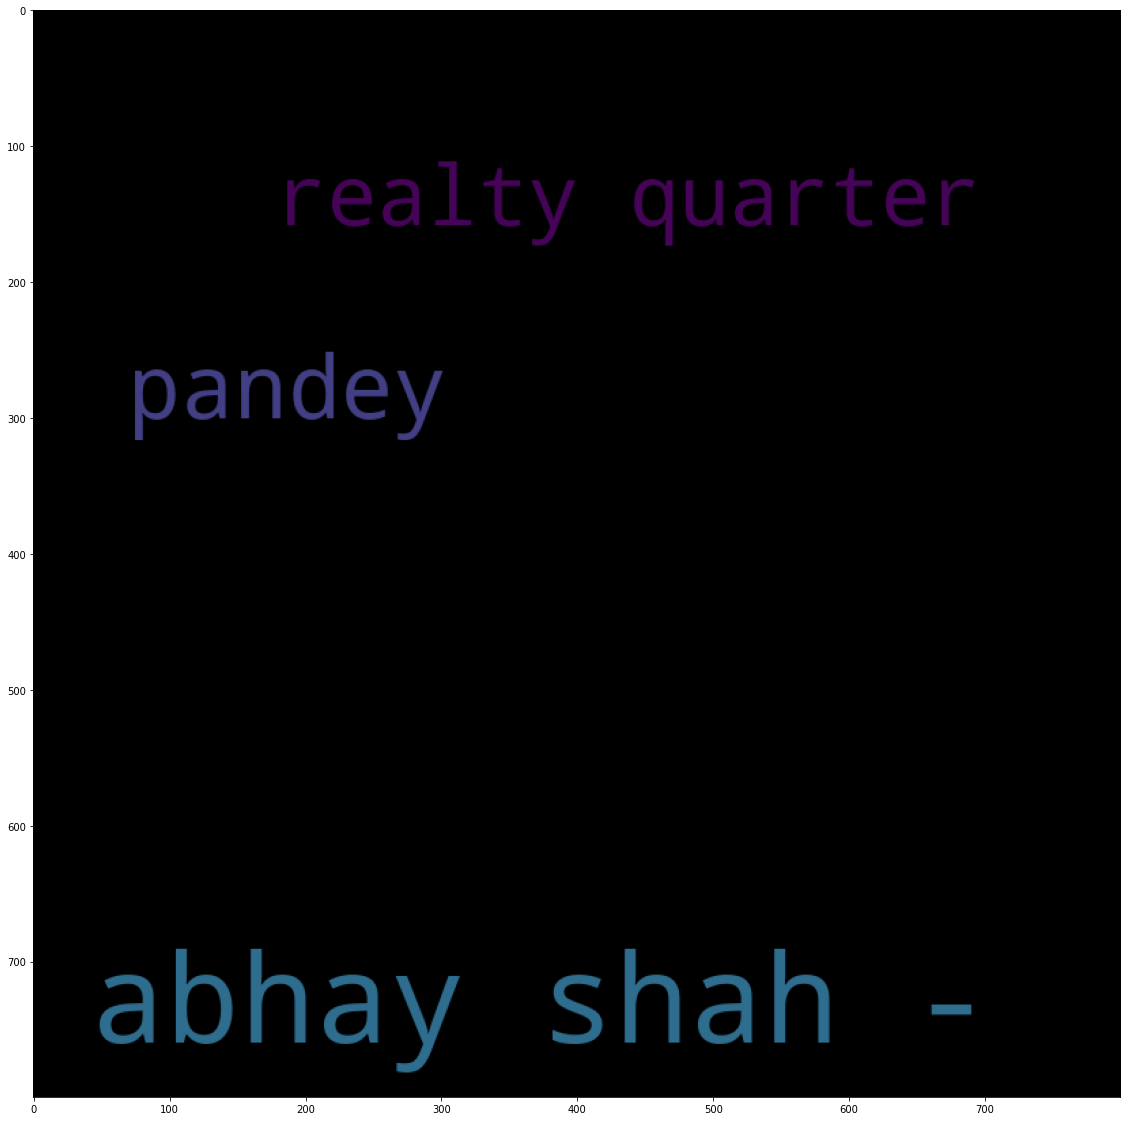

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

def draw_entities_word_cloud(entity_type, min_times=10):
    stopwords = set(STOPWORDS) | {"doc", "date","memo", "subject", 'state',
                                 }
    stopwords_parts = {"sent", "subject", "original message", "unclassified" }
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10)
    def skip_entity(e):
        if e in stopwords:
            return True
        for p in stopwords_parts:
            if p in e:
                return True
        return False

    # using the subject frquencies
    d = {k:v for k,v in count_entities_dict[entity_type].items() if v > min_times and not skip_entity(k)}
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize = (20, 20), facecolor = None) 
    plt.imshow(wordcloud)
draw_entities_word_cloud("PERSON",10)

 ----------------- PERSON ----------------
 ----------------- DATE ----------------
 ----------------- ORG ----------------
 ----------------- CARDINAL ----------------
 ----------------- GPE ----------------
 ----------------- ORDINAL ----------------
 ----------------- NORP ----------------
 ----------------- QUANTITY ----------------
No Word in key  QUANTITY
 ----------------- FAC ----------------
 ----------------- WORK_OF_ART ----------------
No Word in key  WORK_OF_ART
 ----------------- PERCENT ----------------
No Word in key  PERCENT
 ----------------- LOC ----------------
 ----------------- PRODUCT ----------------
No Word in key  PRODUCT
 ----------------- LAW ----------------
No Word in key  LAW
 ----------------- TIME ----------------
No Word in key  TIME
 ----------------- MONEY ----------------
No Word in key  MONEY
 ----------------- EVENT ----------------
No Word in key  EVENT


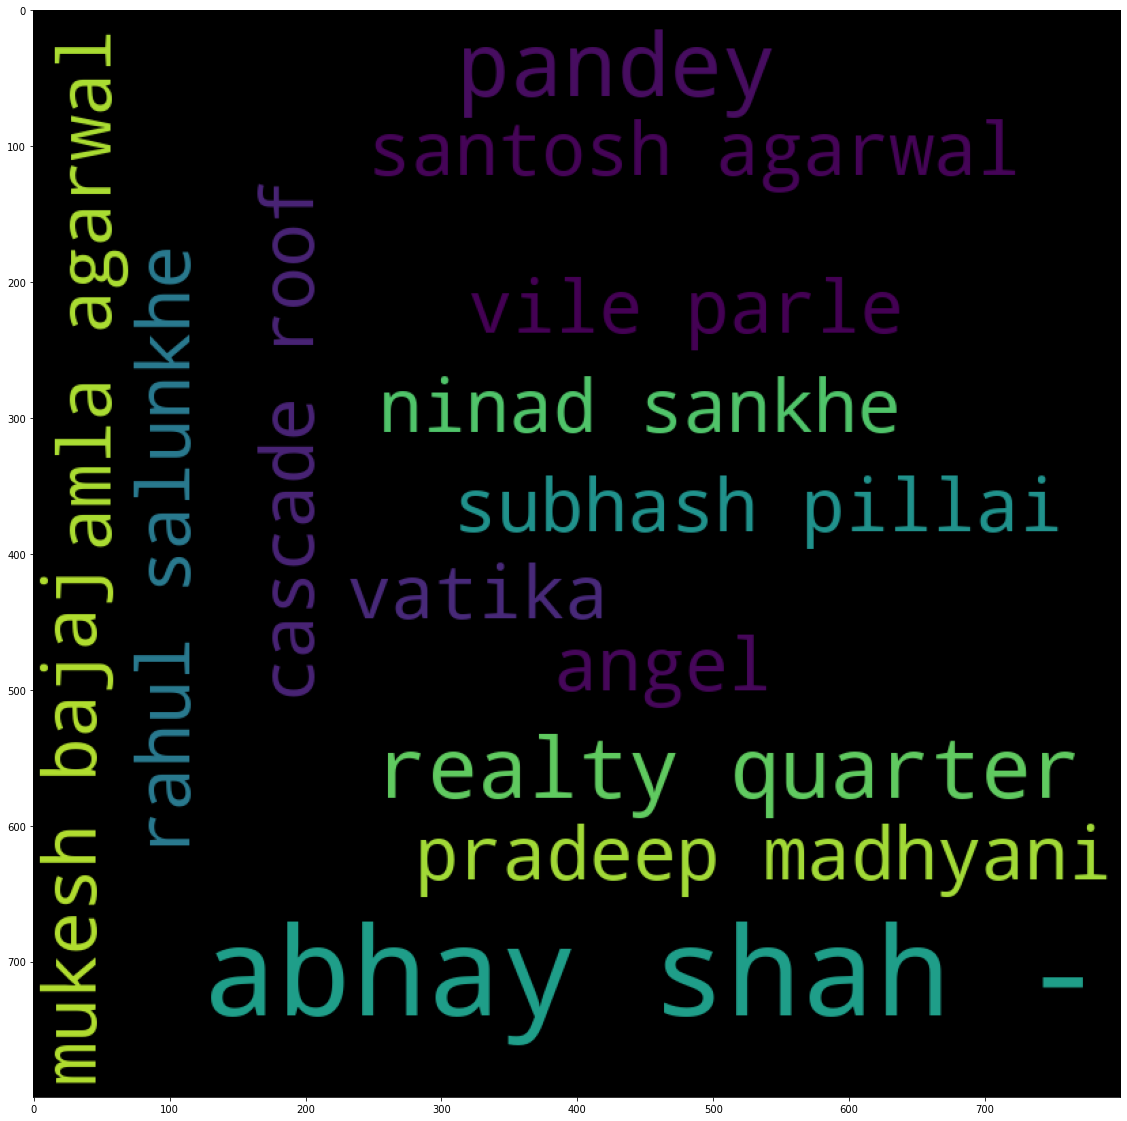

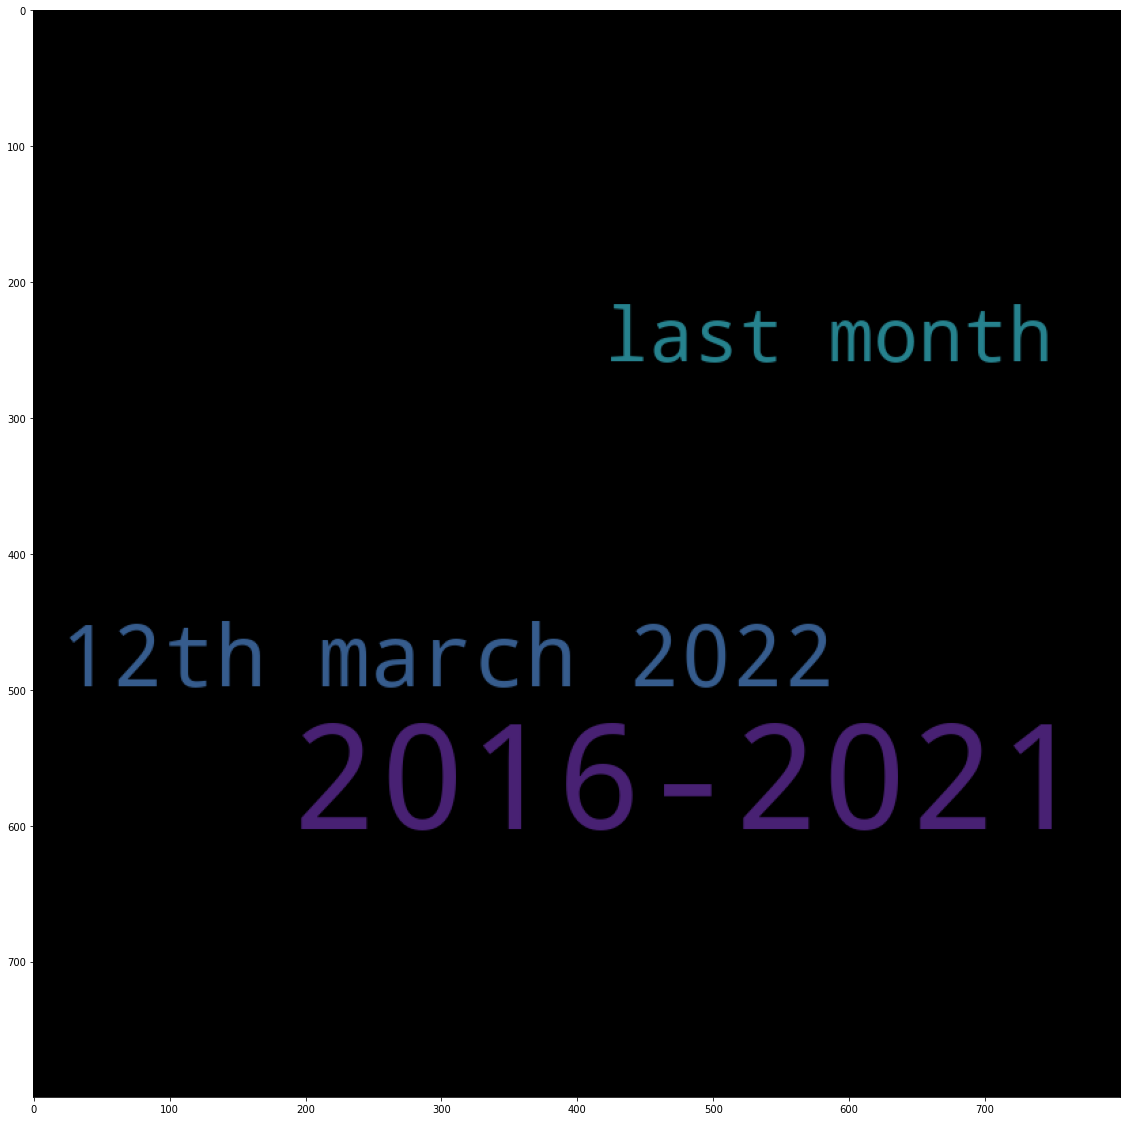

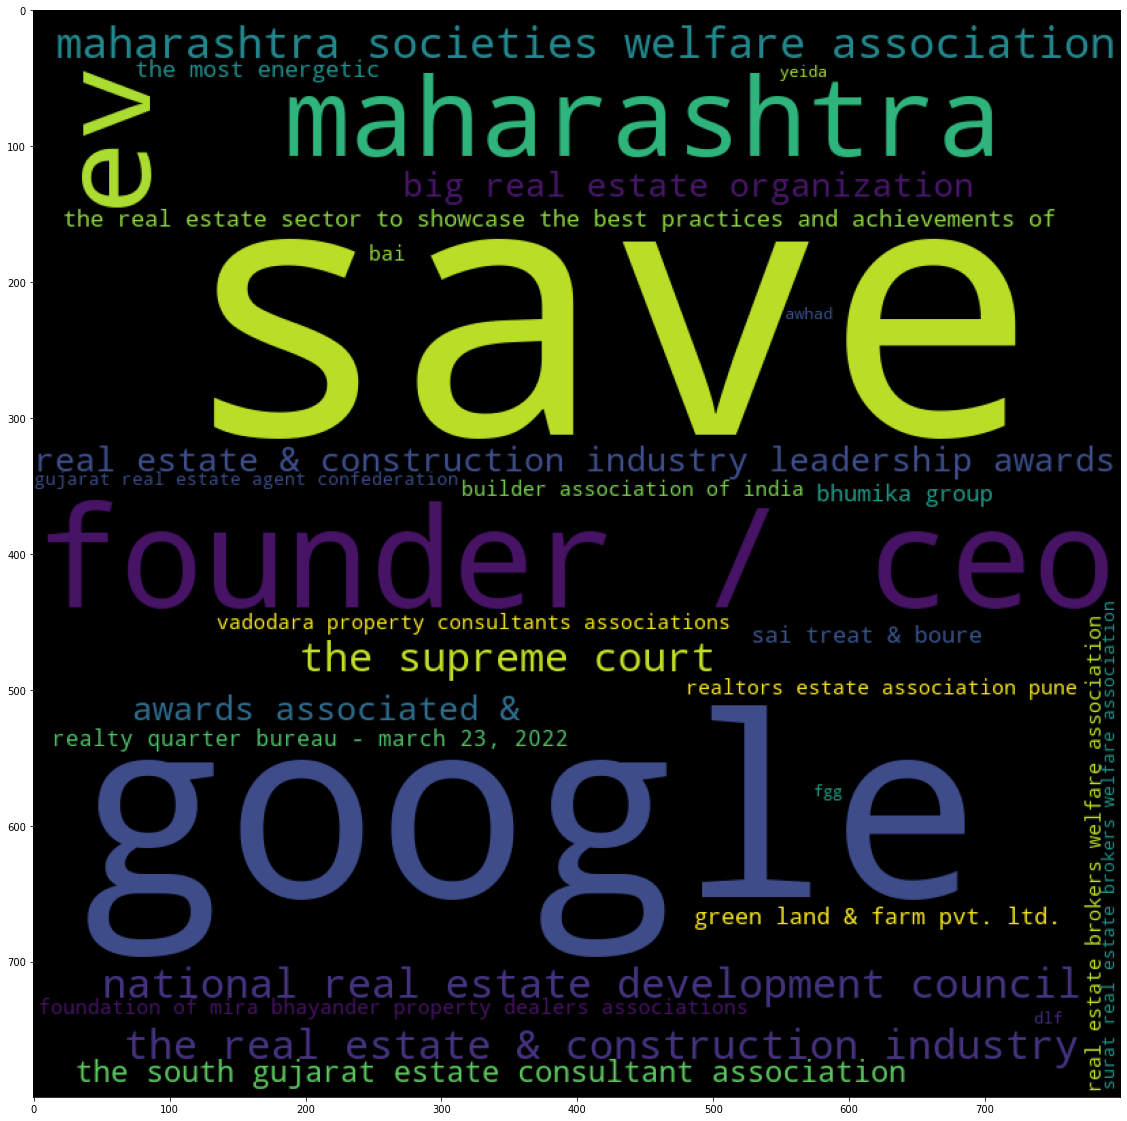

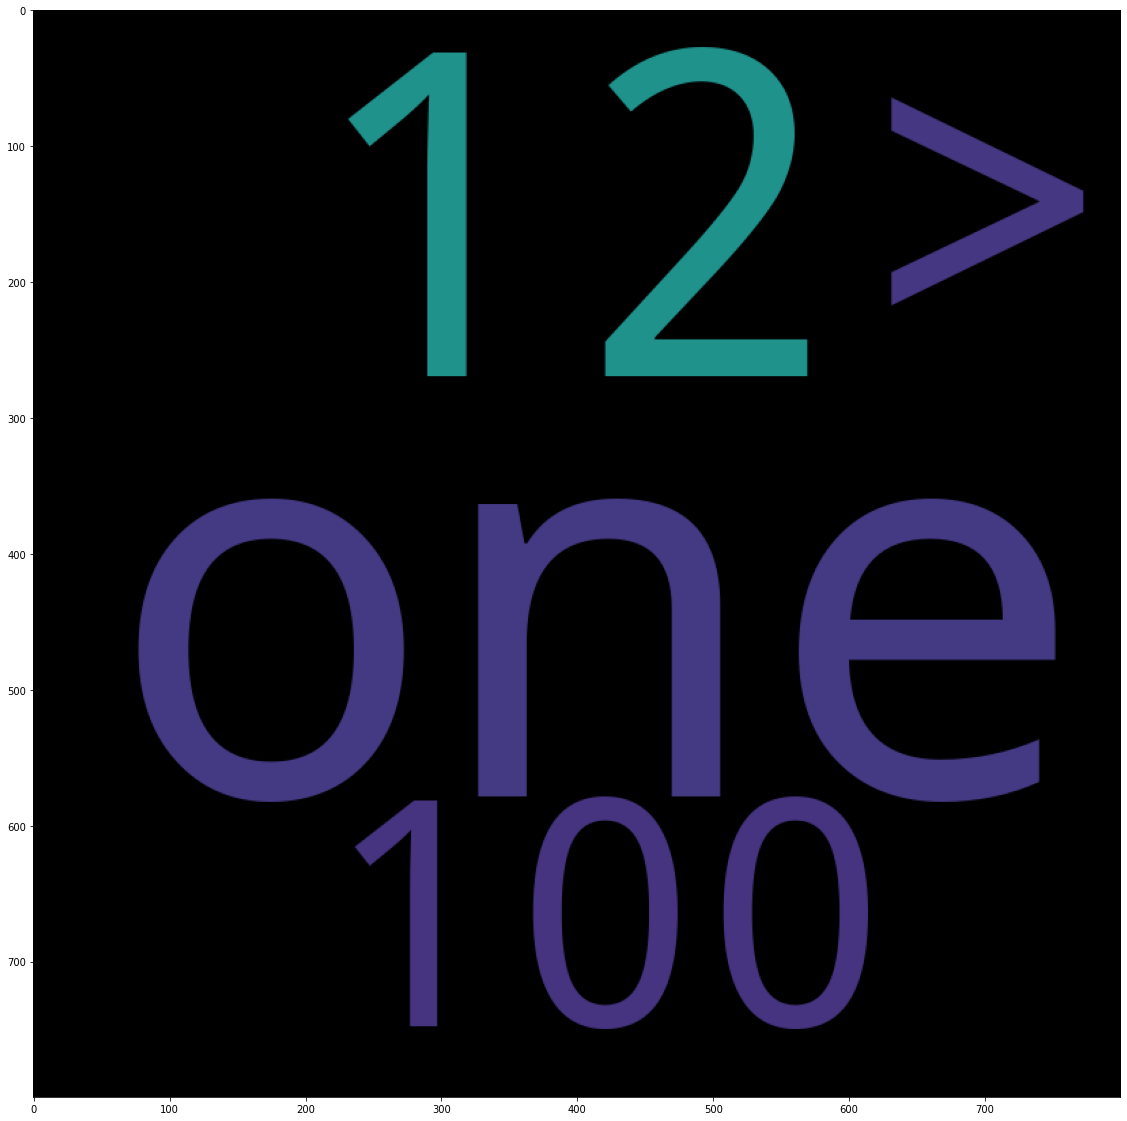

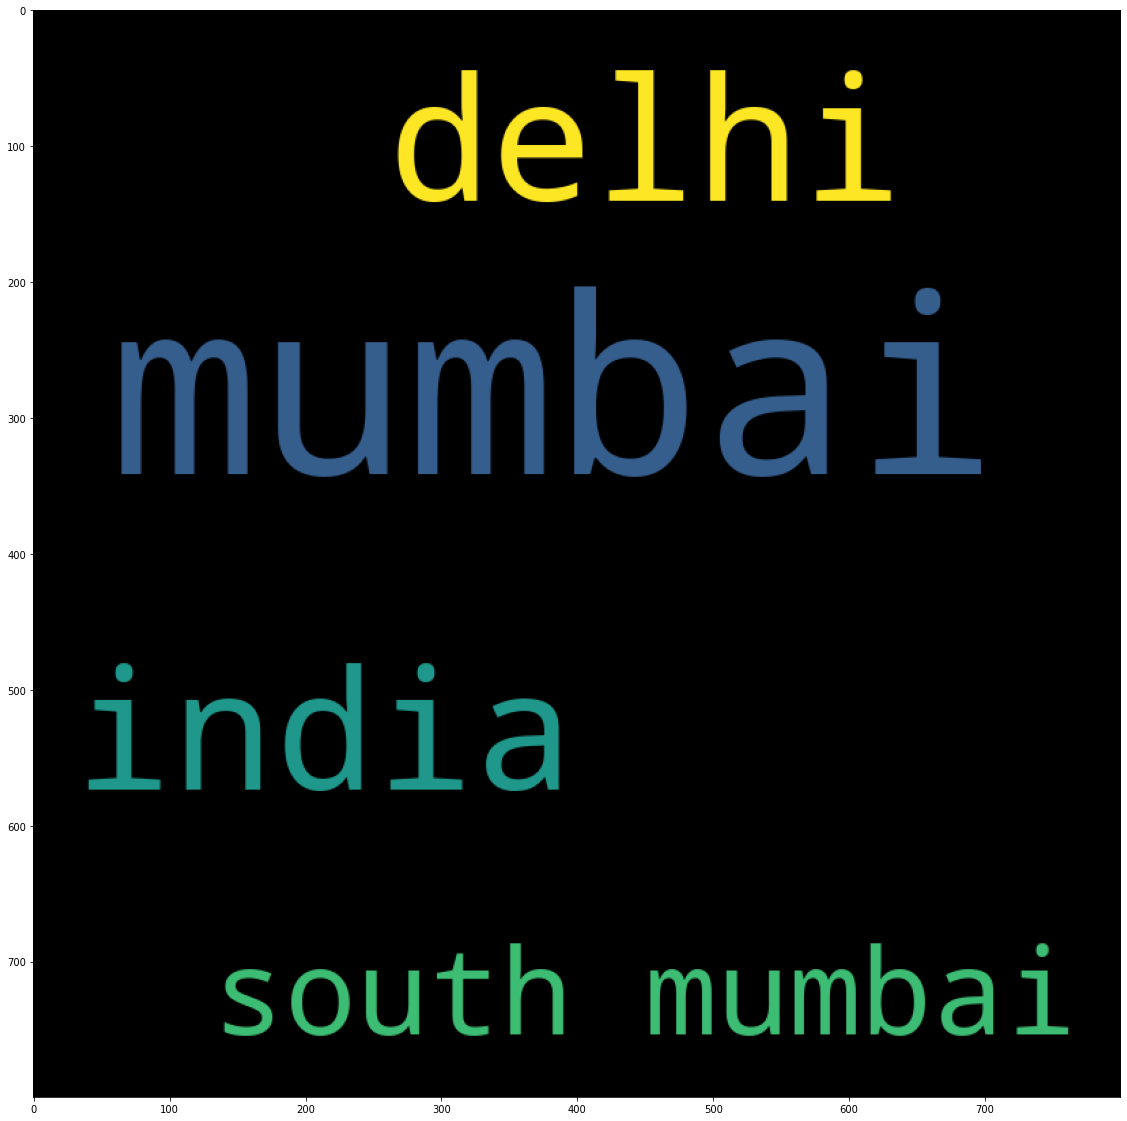

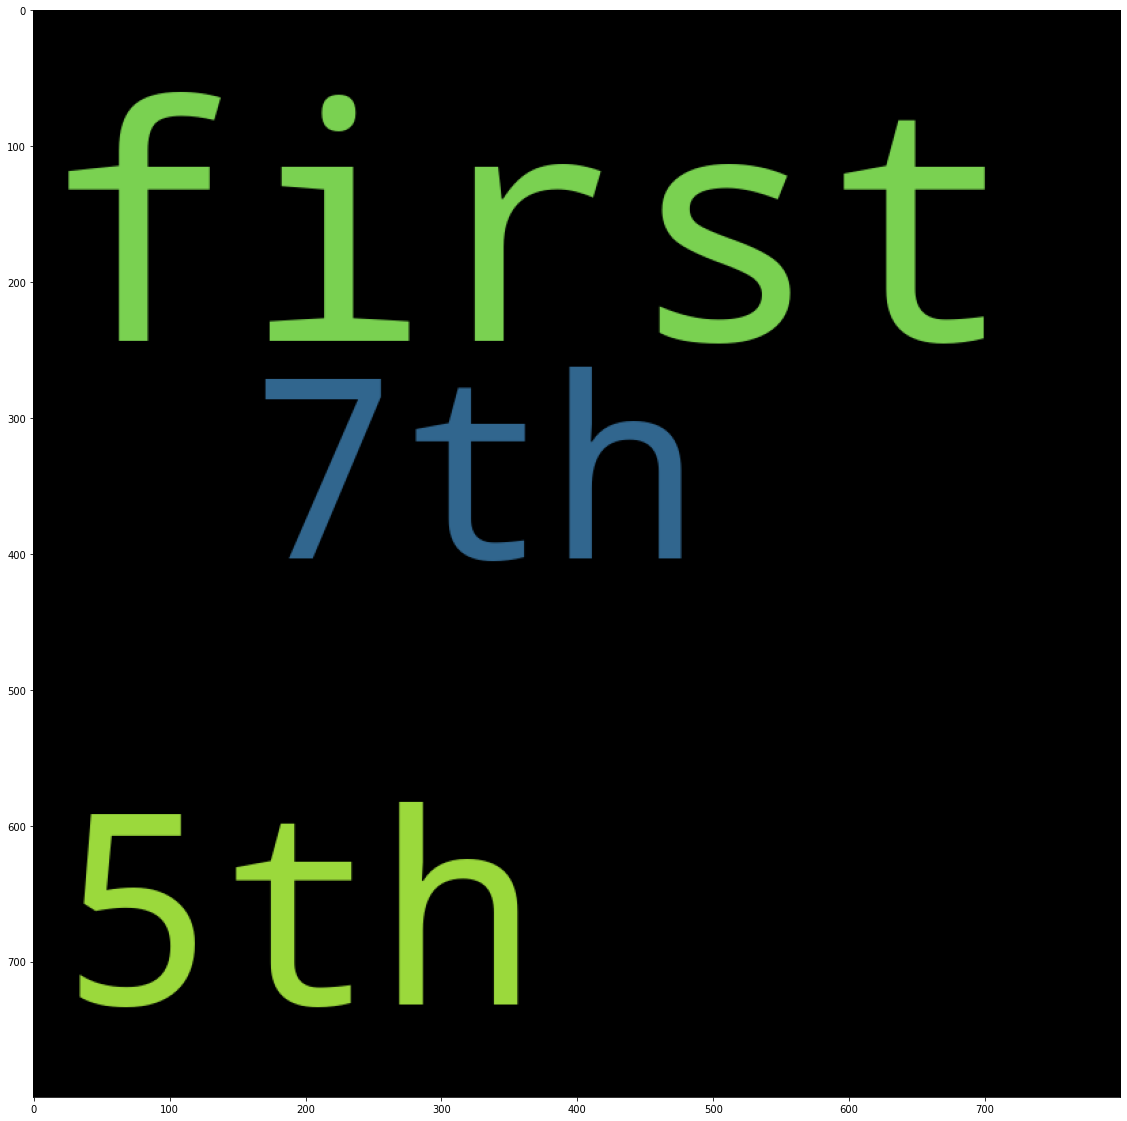

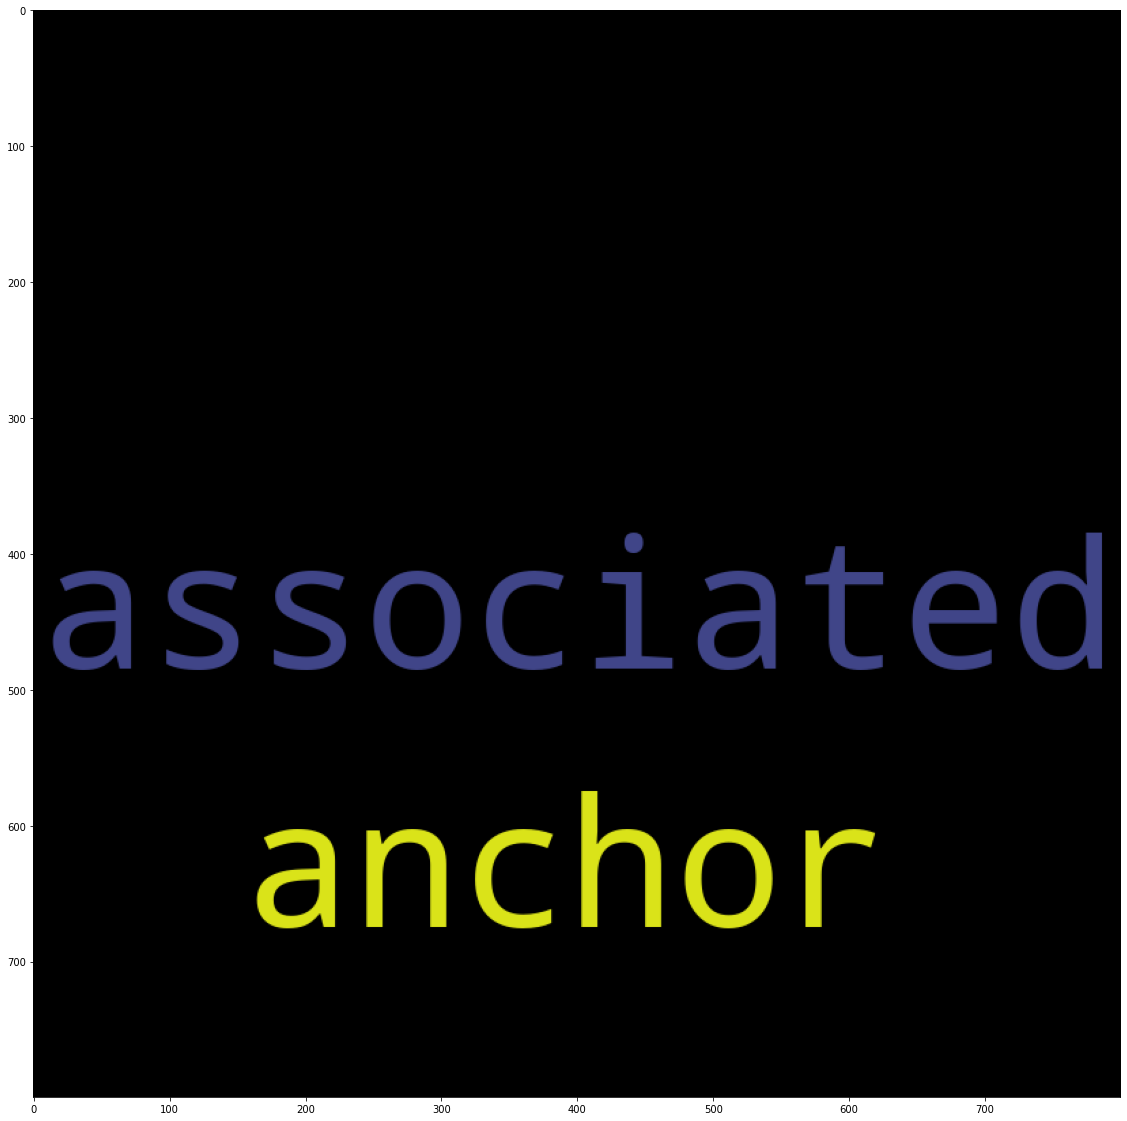

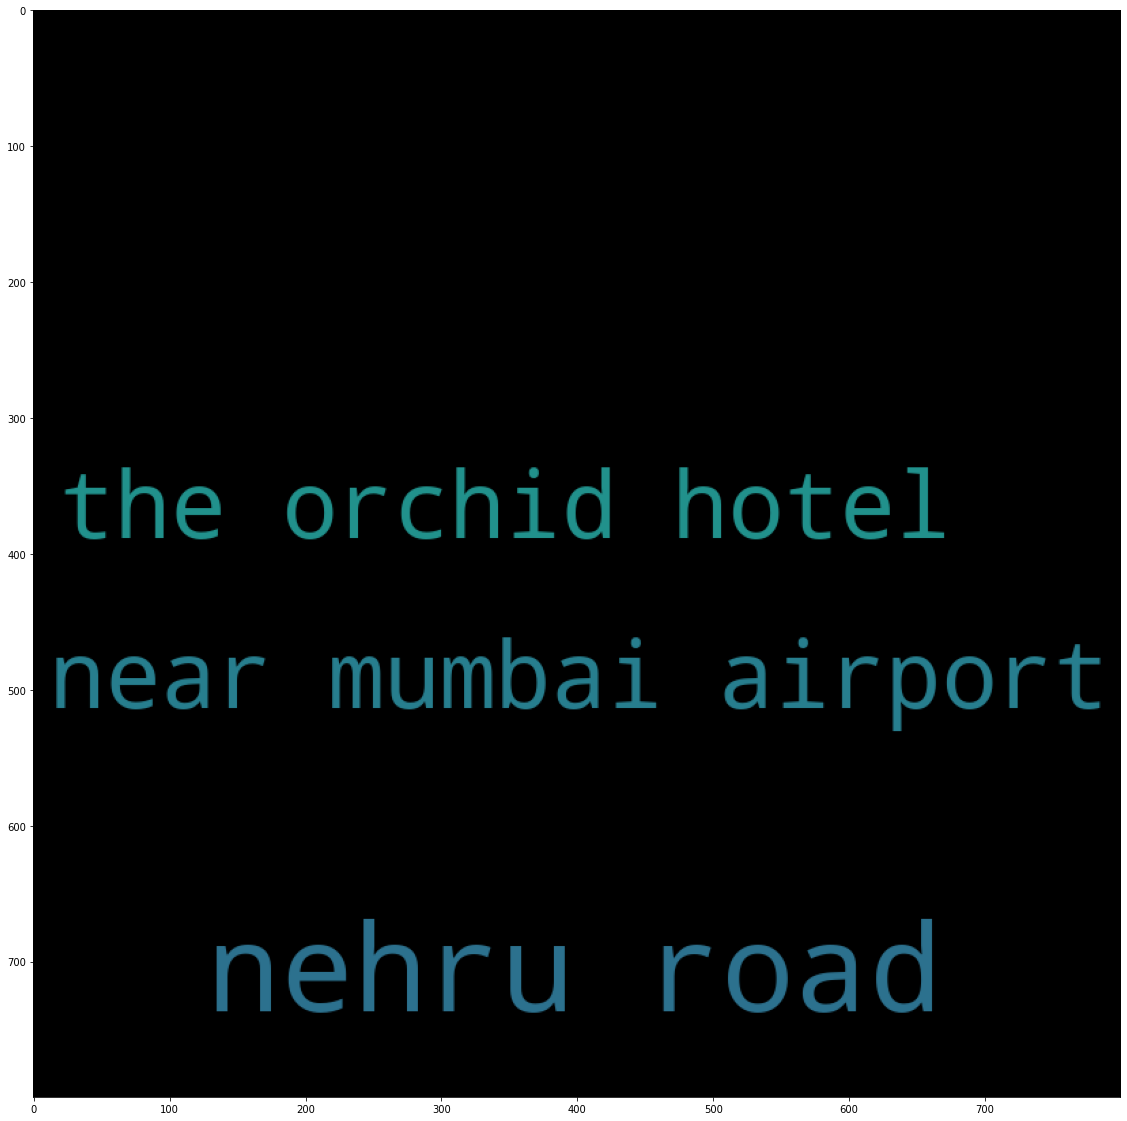

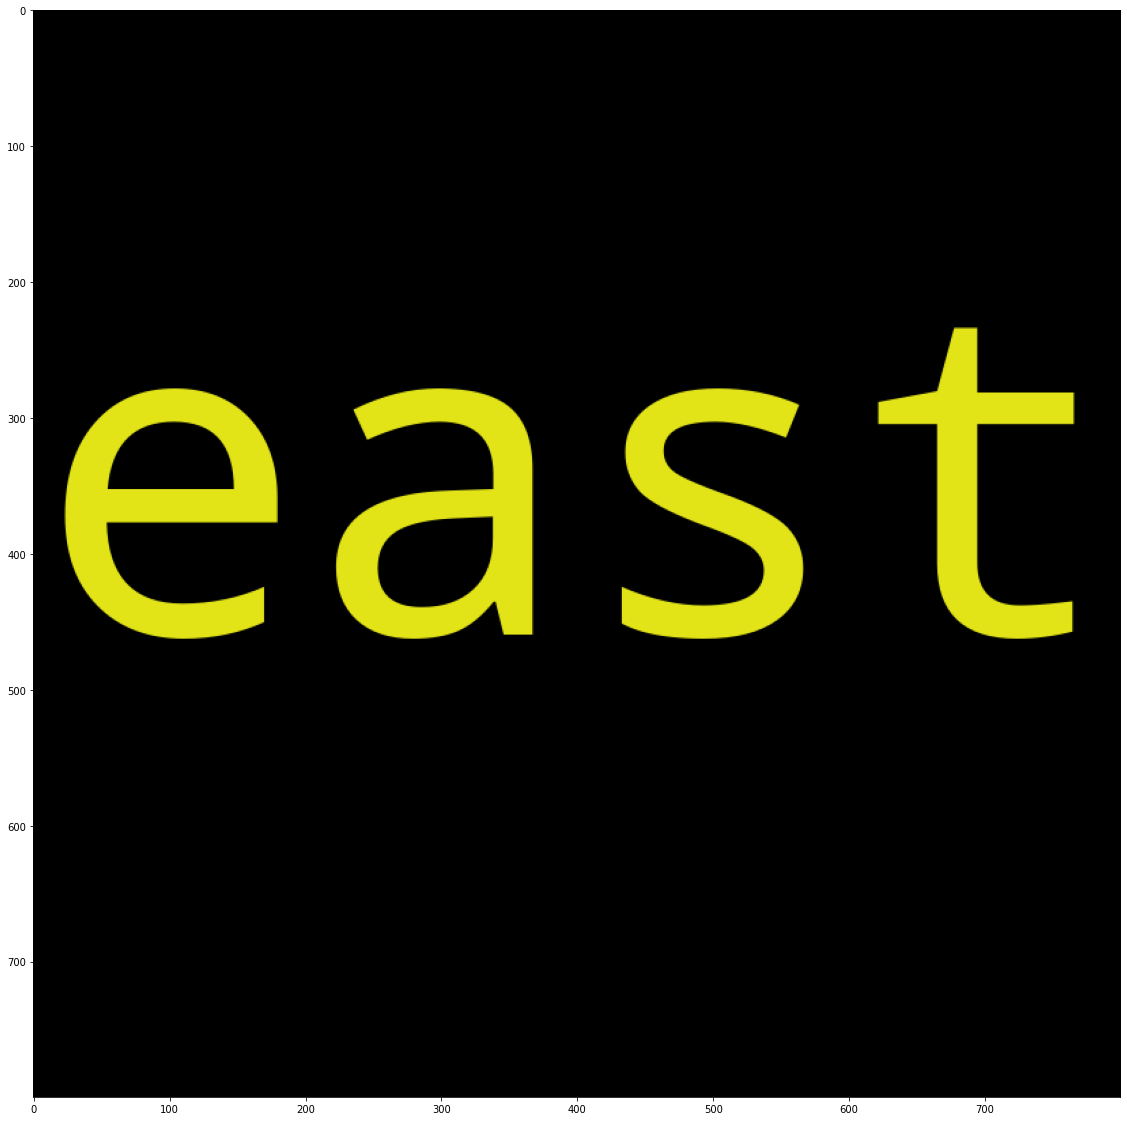

In [ ]:
for key in count_entities_dict.keys():
  try:
    print (' ----------------- %s ----------------'%key)
 
    draw_entities_word_cloud(key ,5)
  except:
    print ('No Word in key ', key)

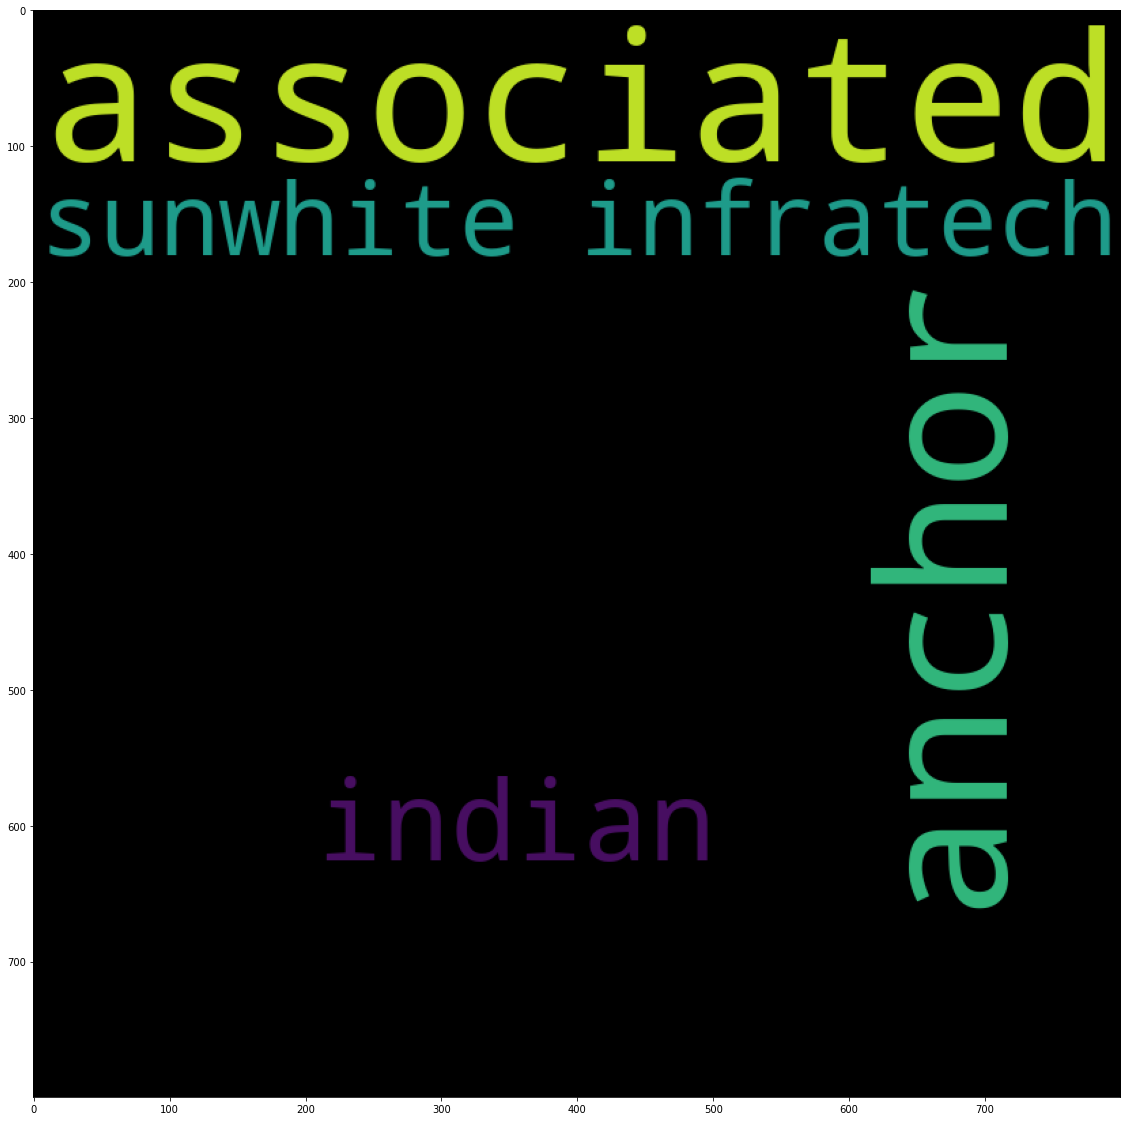

In [ ]:
draw_entities_word_cloud("NORP",1)